# Implementation of ANN using Keras

In [60]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os 

In [61]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Verion {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Verion 2.12.0
Keras Version 2.12.0


In [62]:
os.getcwd()

'd:\\data science\\Deep Learning and Neural Network'

## GPU/ CPU Check

In [63]:
tf.config.list_physical_devices("GPU")

[]

In [64]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [65]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [66]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [67]:
check_list = ['GPU', 'CPU']
for device in check_list:

    out = tf.config.list_physical_devices (device)
    if len(out) > 0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple Classifier using keras on MNIST data 

In [68]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [69]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [70]:
X_train_full.shape

(60000, 28, 28)

In [71]:
X_test.shape

(10000, 28, 28)

In [72]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [73]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28)


In [74]:
# Creating a validation  data set from the full training data
# Scale the data betweedn 0 to 1 by dividing it by 255, as it's an unsigned data between 0- 255 range

X_valid, X_train = X_train_full[:5000] /255., X_train_full[5000:]/ 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# scaling the test data as well 
X_test = X_test / 255. 

In [75]:
# Train = 55000
# Test = 10000
# Validation = 5000

In [76]:
len(X_train_full[5000:])

55000

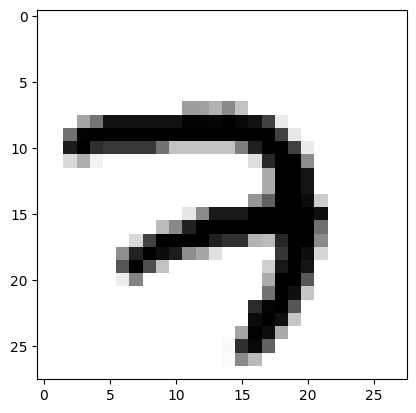

In [77]:
# Plotting  the first image of train data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot: >

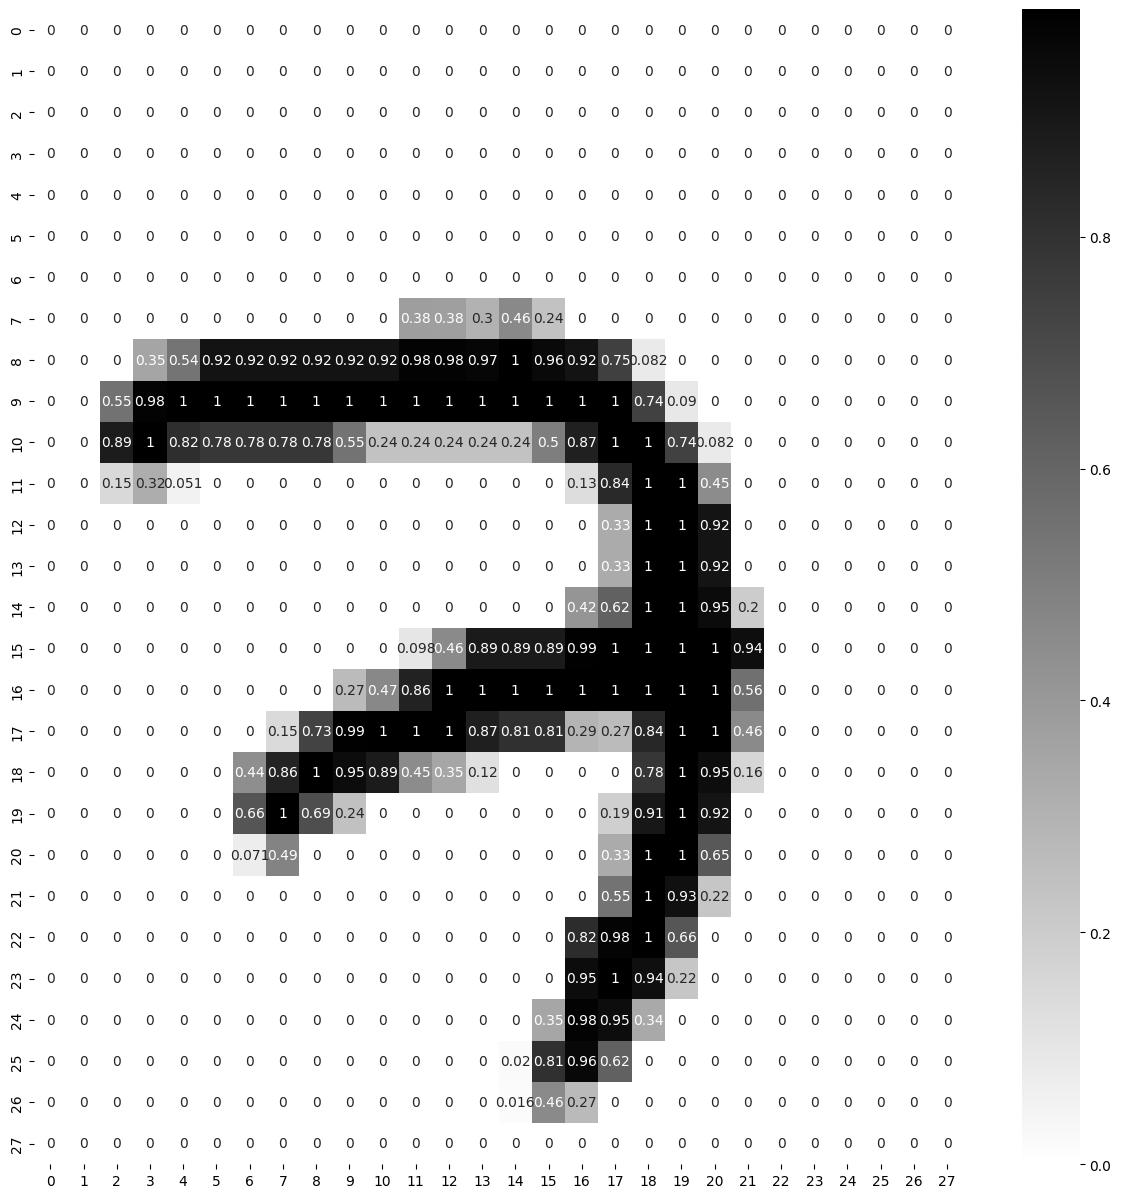

In [78]:
# showing the same image in heatmap 
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[0], annot=True, cmap = "binary")

In [79]:
# Trainable Parameters 

In [80]:
# Creating layers of ANN
Layers = [tf.keras.layers.Flatten(input_shape = [28, 28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputLayer"),
          ]

model_clf = tf.keras.models.Sequential(Layers)

In [81]:
model_clf.layers

In [82]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [83]:
## 266610 parameters were used 

In [84]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [85]:
hidden1.get_weights()[0].shape

(784, 300)

In [86]:
weights, biases = hidden1.get_weights()

In [87]:
weights.shape

(784, 300)

In [88]:
hidden1.get_weights()

[array([[-0.03194119, -0.02195927, -0.0638835 , ...,  0.01619184,
         -0.04970904, -0.03818449],
        [ 0.00989157, -0.01601671, -0.04902016, ..., -0.00155593,
          0.02732024,  0.00277702],
        [-0.02569529, -0.04692581, -0.05152735, ..., -0.04911736,
          0.01196711, -0.02327833],
        ...,
        [ 0.01307131, -0.07196902, -0.01423569, ...,  0.02954742,
         -0.02629153, -0.06637363],
        [ 0.00990244,  0.03013173, -0.06916396, ..., -0.03781721,
         -0.01829649,  0.06663638],
        [-0.06175457,  0.00768067, -0.01724369, ..., -0.00566098,
          0.04617175, -0.06109165]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [90]:
# for biases 
print("shape \n", biases.shape)
biases 

shape 
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [91]:
# Loss function 
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [92]:
# training the model 
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6295 - accuracy: 0.8342 - val_loss: 0.3089 - val_accuracy: 0.9148
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2885 - accuracy: 0.9178 - val_loss: 0.2443 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2362 - accuracy: 0.9320 - val_loss: 0.2098 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2026 - accuracy: 0.9422 - val_loss: 0.1778 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1777 - accuracy: 0.9499 - val_loss: 0.1622 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1583 - accuracy: 0.9550 - val_loss: 0.1480 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1425 - accuracy: 0.9604 - val_loss: 0.1372 - val_accuracy:

In [93]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [94]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.629512,0.834236,0.308886,0.9148
1,0.288488,0.917818,0.244308,0.9352
2,0.236209,0.932036,0.209843,0.9418
3,0.202648,0.942200,0.177786,0.9518
4,0.177745,0.949855,0.162195,0.9554
5,0.158285,0.954964,0.147972,0.9610
6,0.142502,0.960364,0.137200,0.9626
7,0.128931,0.963891,0.127077,0.9658
8,0.117422,0.967491,0.120794,0.9662
9,0.107362,0.969873,0.110730,0.9680


<AxesSubplot: >

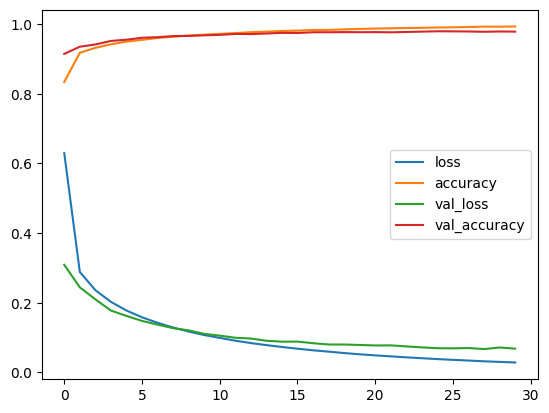

In [95]:
#plotting 
pd.DataFrame(history.history).plot()

In [96]:
# evalauating the model 
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9771


[0.0728001520037651, 0.9771000146865845]

Sample check of test data

In [97]:
x_new = X_test[:3]

In [99]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot: >

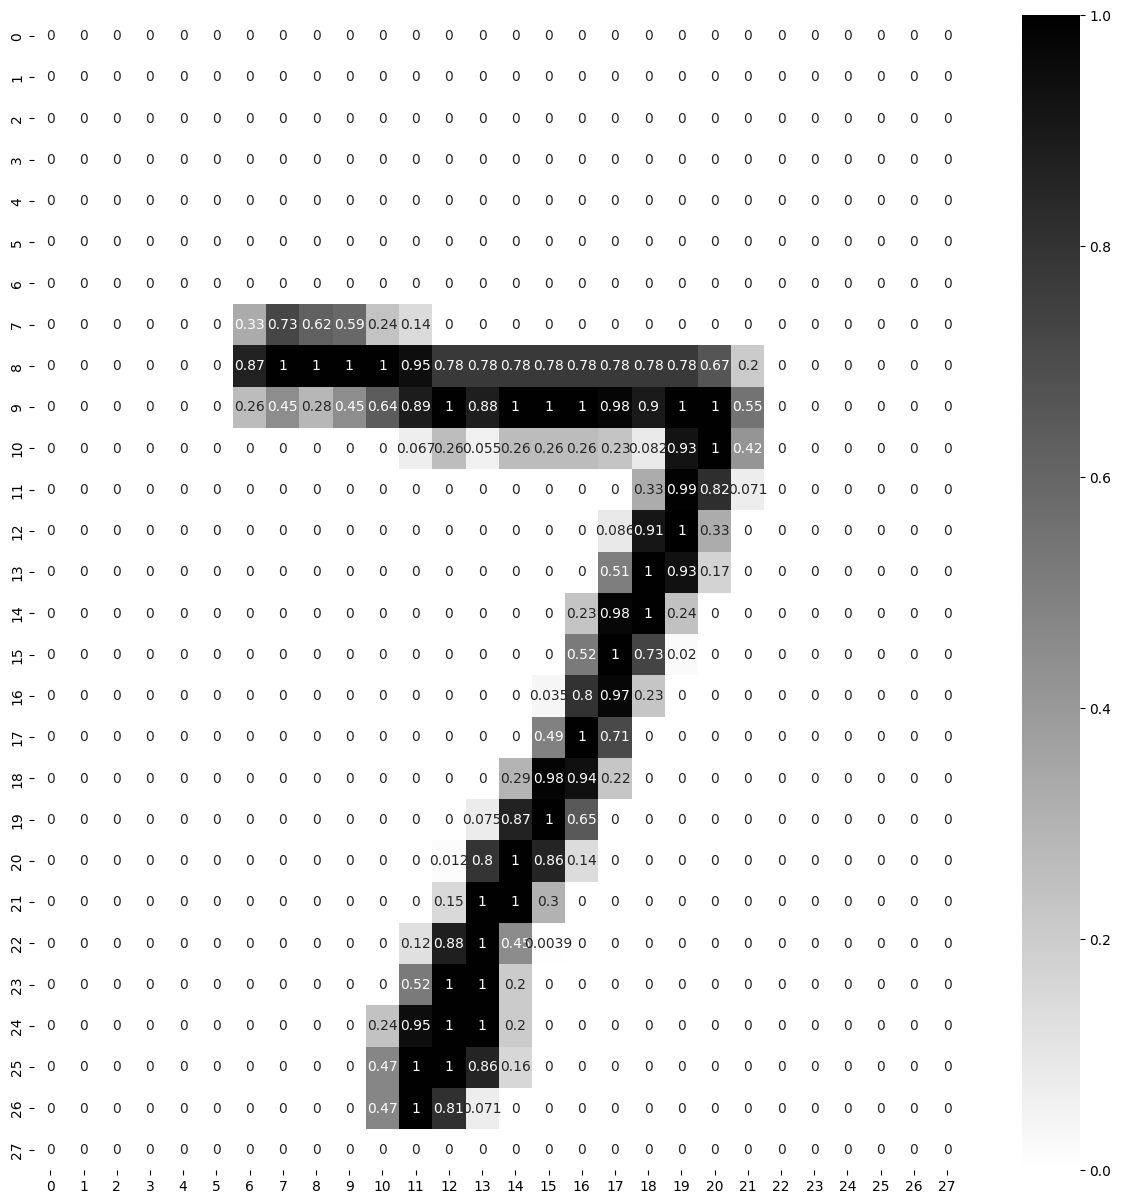

In [101]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_test[0], annot= True, cmap="binary")

In [102]:
# Checking if model can predict or not 
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 190ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [103]:
y_prob

array([[6.0551984e-06, 1.9345624e-08, 1.5259432e-04, 1.9604059e-04,
        1.5402037e-08, 2.4776736e-07, 2.1550070e-10, 9.9962592e-01,
        9.3143790e-06, 9.8141518e-06],
       [2.2281290e-07, 5.7337429e-06, 9.9995828e-01, 4.0091891e-06,
        9.0300293e-12, 3.6129566e-07, 2.2417478e-06, 1.7440390e-12,
        2.9109602e-05, 8.0783291e-13],
       [1.0342520e-05, 9.9643397e-01, 5.3507334e-04, 3.1743723e-05,
        1.3989701e-04, 7.7033990e-05, 3.2142526e-04, 1.1533459e-03,
        1.2907374e-03, 6.3415850e-06]], dtype=float32)

In [104]:
y_pred = np.argmax(y_prob, axis=-1)

In [105]:
y_pred

array([7, 2, 1], dtype=int64)

In [106]:
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
# plotting the actual and predicted one 
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap = "binary")